# Nitrate_PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'ticks', font_scale = 1.5)

%matplotlib inline
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 30)

## Data_preprocess

분석에 앞서 

In [2]:
df = pd.read_csv('data/Nitrate_Florida_transfose.csv', encoding = 'cp949')
df = df.copy()
df['Date'] = df['Date'].astype('datetime64[D]')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   37 non-null     int64         
 1   Date         37 non-null     datetime64[ns]
 2   NH4-T(mg/L)  33 non-null     float64       
 3   SO4(mg/L)    37 non-null     float64       
 4   Pb-T(ug/L)   17 non-null     float64       
 5   PO4-T(mg/L)  27 non-null     float64       
 6   TOC(mg/L)    37 non-null     float64       
 7   TP-T(mg/L)   9 non-null      float64       
 8   Mn-T(mg/L)   37 non-null     float64       
 9   Fe-T(mg/L)   37 non-null     float64       
 10  Nox-T(mg/L)  37 non-null     float64       
 11  DO(mg/L)     28 non-null     float64       
 12  pH-Field     28 non-null     float64       
 13  depth(ft)    33 non-null     float64       
 14  Station      37 non-null     object        
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memo

In [4]:
df = df[(df['Station'] == 'M-0779') | (df['Station'] == 'M-0780') | (df['Station'] == 'M-0781')]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   27 non-null     int64         
 1   Date         27 non-null     datetime64[ns]
 2   NH4-T(mg/L)  27 non-null     float64       
 3   SO4(mg/L)    27 non-null     float64       
 4   Pb-T(ug/L)   17 non-null     float64       
 5   PO4-T(mg/L)  27 non-null     float64       
 6   TOC(mg/L)    27 non-null     float64       
 7   TP-T(mg/L)   9 non-null      float64       
 8   Mn-T(mg/L)   27 non-null     float64       
 9   Fe-T(mg/L)   27 non-null     float64       
 10  Nox-T(mg/L)  27 non-null     float64       
 11  DO(mg/L)     27 non-null     float64       
 12  pH-Field     27 non-null     float64       
 13  depth(ft)    27 non-null     float64       
 14  Station      27 non-null     object        
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memo

In [5]:
X = df[['NH4-T(mg/L)', 'SO4(mg/L)', 'Mn-T(mg/L)', 'Fe-T(mg/L)', 'Nox-T(mg/L)', 'PO4-T(mg/L)', 'TOC(mg/L)', 'DO(mg/L)',
    'pH-Field']]
Y = df[['Station']]

X

,NH4-T(mg/L),SO4(mg/L),Mn-T(mg/L),Fe-T(mg/L),Nox-T(mg/L),PO4-T(mg/L),TOC(mg/L),DO(mg/L),pH-Field
0,0.187651,44.0911,0.003945,0.062152,0.0085,0.0148,2.090,0.12,7.13
1,0.181323,1.9158,0.003891,0.072209,0.0131,0.0249,2.290,0.07,7.18
2,0.172222,38.6228,0.003606,0.056512,0.0080,0.0248,1.770,0.12,7.14
3,0.166495,38.5716,0.003257,0.037487,0.0120,0.0192,3.020,0.00,7.14
4,0.185579,42.8954,0.003591,0.051488,0.0162,0.0232,1.514,0.13,7.14
...,...,...,...,...,...,...,...,...,...
22,0.104386,19.0114,0.036660,1.061951,0.0074,0.0275,5.670,0.23,6.73
23,0.093167,13.0652,0.038742,1.070973,0.0070,0.0274,1.060,0.09,6.67
24,0.090484,12.7344,0.039173,1.469707,0.0061,0.0411,1.650,0.13,6.74
25,0.101248,6.6423,0.038194,1.200755,0.0085,0.0249,1.286,0.30,6.71


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NH4-T(mg/L)  27 non-null     float64
 1   SO4(mg/L)    27 non-null     float64
 2   Mn-T(mg/L)   27 non-null     float64
 3   Fe-T(mg/L)   27 non-null     float64
 4   Nox-T(mg/L)  27 non-null     float64
 5   PO4-T(mg/L)  27 non-null     float64
 6   TOC(mg/L)    27 non-null     float64
 7   DO(mg/L)     27 non-null     float64
 8   pH-Field     27 non-null     float64
dtypes: float64(9)
memory usage: 2.1 KB


In [7]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)
x_std[:3]

array([[-0.03086209,  0.24070613, -0.81943085, -0.69600761,  0.08074426,
        -1.18896724, -0.3075189 , -0.26454702,  0.75141955],
       [-0.10938036, -0.45450882, -0.82306511, -0.67661804,  1.12537311,
        -0.23869946, -0.16242479, -0.71097013,  1.02049551],
       [-0.22230621,  0.15056702, -0.84230642, -0.70688071, -0.03280236,
        -0.24810805, -0.53966947, -0.26454702,  0.80523474]])

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pc = pca.fit_transform(x_std)
pc[:3]

array([[-1.02145814, -1.16919224],
       [-1.47840083, -1.13623309],
       [-1.04120471, -0.61596457]])

In [9]:
pc_y = np.c_[pc, Y]
df_pca = pd.DataFrame(pc_y, columns = ['PC1', 'PC2', 'Station'])
df_pca.head()

,PC1,PC2,Station
0,-1.02146,-1.16919,M-0779
1,-1.4784,-1.13623,M-0779
2,-1.0412,-0.615965,M-0779
3,-1.43953,-1.53151,M-0779
4,-1.14592,-1.82657,M-0779


In [10]:
coeff = np.transpose(pca.components_[0:2])
n = coeff.shape[0]

In [11]:
df_coeff = pd.DataFrame(coeff, columns = ['PC1', 'PC2'])
df_coeff['Columns'] = 0
df_coeff['Columns'] = X.columns
df_coeff
n = [1,4,5,6]
N = [0,2,3,7,8]

df_coeff.style.format({"PC1": "{:20,.3f}", "PC2": "{:20,.3f}"}).background_gradient(cmap='Blues')

,PC1,PC2,Columns
0,-0.424,0.356,NH4-T(mg/L)
1,0.151,-0.283,SO4(mg/L)
2,0.479,0.168,Mn-T(mg/L)
3,0.483,0.113,Fe-T(mg/L)
4,-0.048,-0.619,Nox-T(mg/L)
5,-0.069,0.589,PO4-T(mg/L)
6,-0.061,0.076,TOC(mg/L)
7,0.314,0.074,DO(mg/L)
8,-0.474,-0.107,pH-Field


In [12]:
pca_val = pca.explained_variance_ratio_
pca_val

array([0.44886558, 0.15797287])

In [13]:
pc1_eig = pca_val[0]*100
pc2_eig = pca_val[1]*100

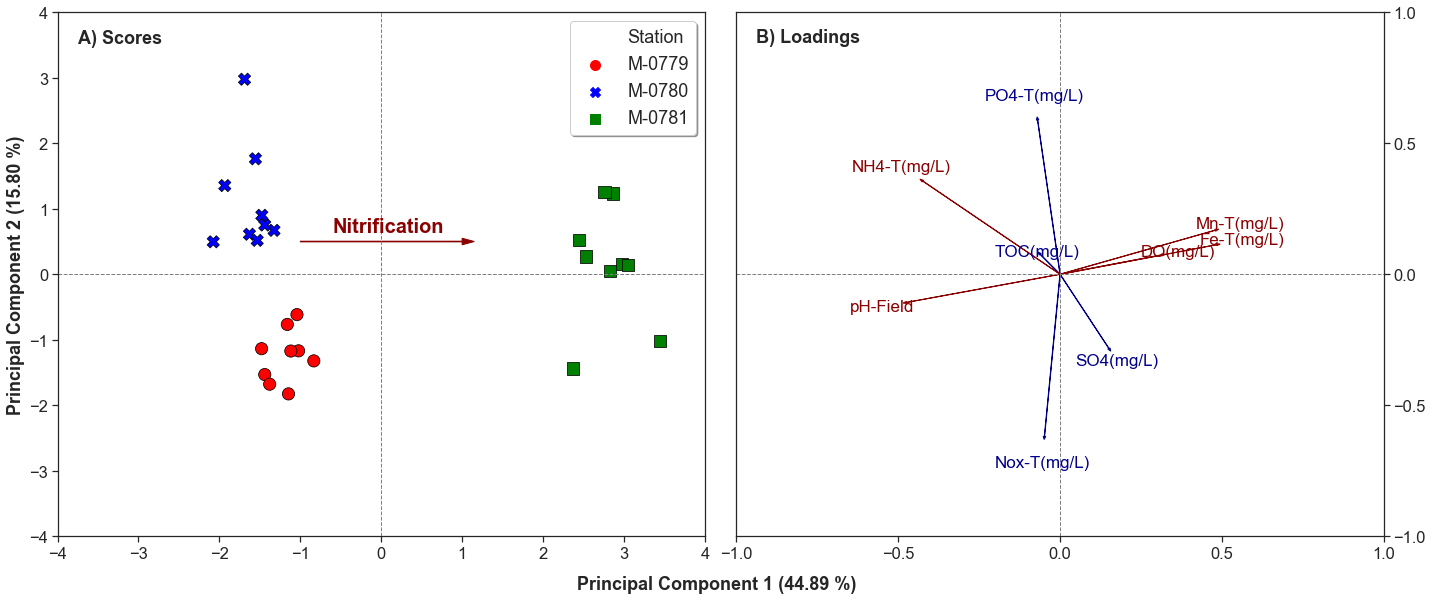

In [14]:
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#from matplotlib_colorbar.colorbar import Colorbar
from matplotlib.ticker import LogLocator
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(1, 2, figsize = (20, 8))


#axins = inset_axes(ax, width='50%', height='50%', loc= 'upper right') 
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca, hue = 'Station', s = 150, edgecolor="black", style = 'Station',
                palette = ['red', 'blue', 'green'], legend = 'full', ax = ax[0])

lgnd = ax[0].legend(scatterpoints=1, fontsize=18, shadow = True)

for handle in lgnd.legendHandles:
    handle.set_sizes([100])

ax[0].axhline(y=0, color = 'grey', linestyle='--', linewidth = 1)
ax[1].axhline(y=0, color = 'grey', linestyle='--', linewidth = 1)
ax[0].axvline(x=0, color = 'grey', linestyle='--', linewidth = 1)
ax[1].axvline(x=0, color = 'grey', linestyle='--', linewidth = 1)

for i in n :
    plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'darkblue', head_width=0.008)
    plt.text(coeff[i, 0]*1.16, coeff[i, 1]*1.16, X.columns[i], color = 'darkblue', ha = 'center', va = 'center', fontsize = 17)
    
for i in N :
    plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'darkred', head_width=0.008)
    plt.text(coeff[i, 0]*1.16, coeff[i, 1]*1.16, X.columns[i], color = 'darkred', ha = 'center', va = 'center', fontsize = 17)
    
    
ax[0].set_xlabel('')
#ax[0].set_xlabel('Principal Component 1 ({:.2f} %)'.format(pc1_eig), weight = 'bold', fontsize = 18)
#ax[1].set_xlabel('Principal Component 1 ({:.2f} %)'.format(pc1_eig), weight = 'bold', fontsize = 18)
ax[0].set_ylabel('Principal Component 2 ({:.2f} %)'.format(pc2_eig), weight = 'bold', fontsize = 18)
#ax[1].set_ylabel('Principal Component 2 ({:.2f} %)'.format(pc2_eig), weight = 'bold', fontsize = 18)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
    
ax[0].set_xlim(-4, 4)
ax[0].set_ylim(-4, 4)
ax[1].set_xlim(-1, 1, 0.5)
ax[1].set_ylim(-1, 1)

ax[1].set_xticks([-1, -.5, 0, .5, 1])
ax[1].set_yticks([-1, -.5, 0, .5, 1])

ax[0].text(-3.75, 3.75, 'A) Scores', weight = 'bold', fontsize = 18,
          verticalalignment = 'top', horizontalalignment='left')

ax[1].text(-.94, .94, 'B) Loadings', weight = 'bold', fontsize = 18,
          verticalalignment = 'top', horizontalalignment='left')

ax[0].arrow(-1, 0.5, 2, 0, color = 'darkred', head_width = 0.1, width  = 0.01)
ax[0].text(-.6, 0.65, 'Nitrification', weight = 'bold', fontsize = 20, color = 'darkred')

fig.text(0.5, -.03, 'Principal Component 1 ({:.2f} %)'.format(pc1_eig), weight = 'bold', fontsize = 18, ha='center')
#plt.text(.35, .9, 'Permeability ($10^{-18}$ m/s)') #fontsize = 15)

plt.tight_layout()
plt.savefig('Nitrification_Some_1', dpi=1000,  ext='png', bbox_inches="tight")


#cbar.set_label('Permeability')
#cbar.ax.tick_params(labelsize=10)
#cbar.set_ticks([1e-22, 1e-20, 1e-18])
#plt.gca().add_artist(cbar)
#axins.yaxis.set_ticks_position("right")




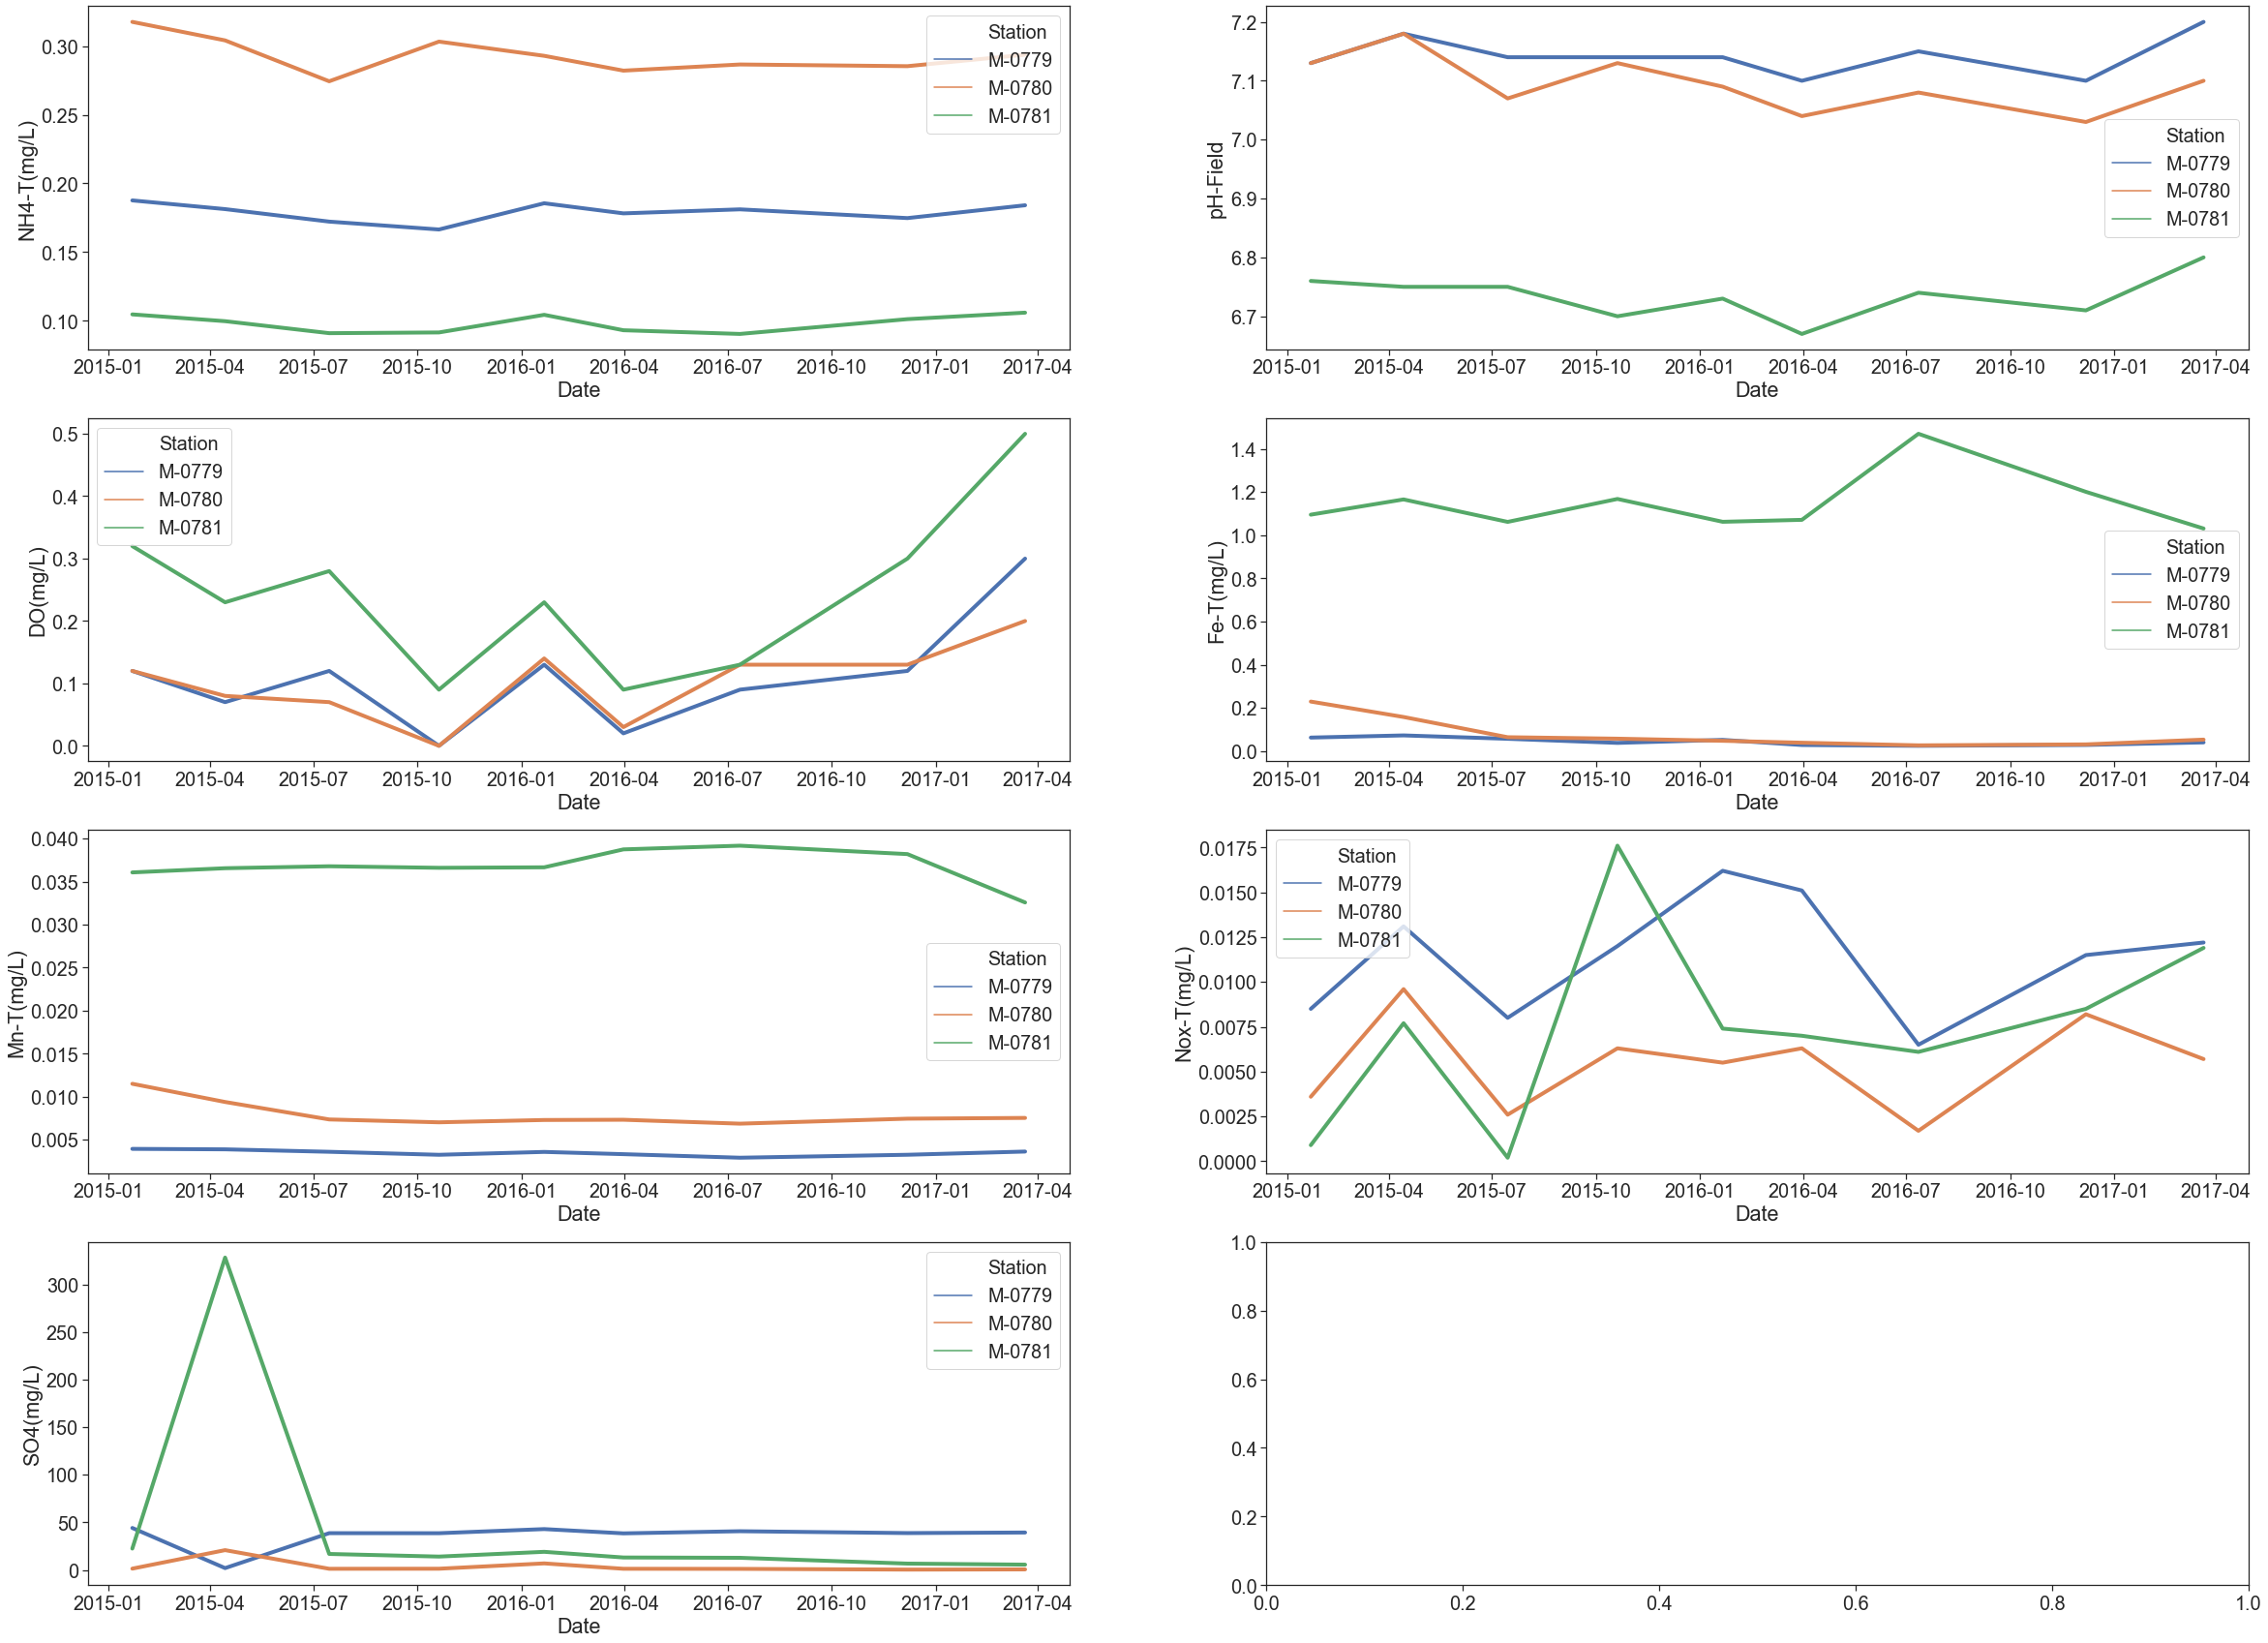

In [15]:
sns.set(style = 'ticks', font_scale = 1.8)
fig, ax = plt.subplots(4, 2, figsize = (40, 30))

sns.lineplot(x = 'Date',  y = 'NH4-T(mg/L)', hue = 'Station', data = df, ax = ax[0,0], linewidth=4)
sns.lineplot(x = 'Date',  y = 'pH-Field', hue = 'Station', data = df, ax = ax[0,1], linewidth=4)
sns.lineplot(x = 'Date',  y = 'DO(mg/L)', hue = 'Station', data = df, ax = ax[1,0], linewidth=4)
sns.lineplot(x = 'Date',  y = 'Fe-T(mg/L)', hue = 'Station', data = df, ax = ax[1,1], linewidth=4)
sns.lineplot(x = 'Date',  y = 'Mn-T(mg/L)', hue = 'Station', data = df, ax = ax[2,0], linewidth=4)
sns.lineplot(x = 'Date',  y = 'Nox-T(mg/L)', hue = 'Station', data =df, ax = ax[2,1], linewidth=4)
sns.lineplot(x = 'Date',  y = 'SO4(mg/L)', hue = 'Station', data = df, ax = ax[3,0], linewidth=4)

In [16]:
df = pd.read_csv('data/Nitrate_Florida_transfose.csv', encoding = 'cp949')
df = df.copy()
df['Date'] = df['Date'].astype('datetime64[D]')
df

,Unnamed: 0,Date,NH4-T(mg/L),SO4(mg/L),Pb-T(ug/L),PO4-T(mg/L),TOC(mg/L),TP-T(mg/L),Mn-T(mg/L),Fe-T(mg/L),Nox-T(mg/L),DO(mg/L),pH-Field,depth(ft),Station
0,0,2015-01-22,0.187651,44.0911,NaN,0.0148,2.090,0.0367,0.003945,0.062152,0.0085,0.12,7.13,145.0,M-0779
1,1,2015-04-14,0.181323,1.9158,NaN,0.0249,2.290,0.0283,0.003891,0.072209,0.0131,0.07,7.18,145.0,M-0779
2,2,2015-07-15,0.172222,38.6228,NaN,0.0248,1.770,0.0277,0.003606,0.056512,0.0080,0.12,7.14,145.0,M-0779
3,3,2015-10-20,0.166495,38.5716,NaN,0.0192,3.020,0.0196,0.003257,0.037487,0.0120,0.00,7.14,145.0,M-0779
4,4,2016-01-21,0.185579,42.8954,NaN,0.0232,1.514,0.0702,0.003591,0.051488,0.0162,0.13,7.14,145.0,M-0779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,32,2016-10-24,0.002490,14.4489,NaN,NaN,3.600,NaN,0.000646,0.015298,0.6176,NaN,NaN,215.0,M-0789
33,33,2016-10-12,NaN,22.7109,NaN,NaN,3.510,NaN,0.002279,0.049596,2.0998,NaN,NaN,NaN,M-0827
34,34,2016-10-12,NaN,20.6172,NaN,NaN,3.770,NaN,0.005531,0.069037,1.9573,NaN,NaN,NaN,M-0827
35,35,2016-10-12,NaN,21.9165,NaN,NaN,3.890,NaN,0.005387,0.064983,2.2102,NaN,NaN,NaN,M-0827


In [17]:
df = df[(df['Station'] == 'M-0779') | (df['Station'] == 'M-0780') | (df['Station'] == 'M-0781') |
       (df['Station'] == 'M-0789') | (df['Station'] == 'M-0827')]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   37 non-null     int64         
 1   Date         37 non-null     datetime64[ns]
 2   NH4-T(mg/L)  33 non-null     float64       
 3   SO4(mg/L)    37 non-null     float64       
 4   Pb-T(ug/L)   17 non-null     float64       
 5   PO4-T(mg/L)  27 non-null     float64       
 6   TOC(mg/L)    37 non-null     float64       
 7   TP-T(mg/L)   9 non-null      float64       
 8   Mn-T(mg/L)   37 non-null     float64       
 9   Fe-T(mg/L)   37 non-null     float64       
 10  Nox-T(mg/L)  37 non-null     float64       
 11  DO(mg/L)     28 non-null     float64       
 12  pH-Field     28 non-null     float64       
 13  depth(ft)    33 non-null     float64       
 14  Station      37 non-null     object        
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memo

In [18]:
df

,Unnamed: 0,Date,NH4-T(mg/L),SO4(mg/L),Pb-T(ug/L),PO4-T(mg/L),TOC(mg/L),TP-T(mg/L),Mn-T(mg/L),Fe-T(mg/L),Nox-T(mg/L),DO(mg/L),pH-Field,depth(ft),Station
0,0,2015-01-22,0.187651,44.0911,NaN,0.0148,2.090,0.0367,0.003945,0.062152,0.0085,0.12,7.13,145.0,M-0779
1,1,2015-04-14,0.181323,1.9158,NaN,0.0249,2.290,0.0283,0.003891,0.072209,0.0131,0.07,7.18,145.0,M-0779
2,2,2015-07-15,0.172222,38.6228,NaN,0.0248,1.770,0.0277,0.003606,0.056512,0.0080,0.12,7.14,145.0,M-0779
3,3,2015-10-20,0.166495,38.5716,NaN,0.0192,3.020,0.0196,0.003257,0.037487,0.0120,0.00,7.14,145.0,M-0779
4,4,2016-01-21,0.185579,42.8954,NaN,0.0232,1.514,0.0702,0.003591,0.051488,0.0162,0.13,7.14,145.0,M-0779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,32,2016-10-24,0.002490,14.4489,NaN,NaN,3.600,NaN,0.000646,0.015298,0.6176,NaN,NaN,215.0,M-0789
33,33,2016-10-12,NaN,22.7109,NaN,NaN,3.510,NaN,0.002279,0.049596,2.0998,NaN,NaN,NaN,M-0827
34,34,2016-10-12,NaN,20.6172,NaN,NaN,3.770,NaN,0.005531,0.069037,1.9573,NaN,NaN,NaN,M-0827
35,35,2016-10-12,NaN,21.9165,NaN,NaN,3.890,NaN,0.005387,0.064983,2.2102,NaN,NaN,NaN,M-0827


In [19]:
X = df[['SO4(mg/L)', 'TOC(mg/L)', 'Mn-T(mg/L)', 'Fe-T(mg/L)', 'Nox-T(mg/L)']]
Y = df[['Station']]

X

,SO4(mg/L),TOC(mg/L),Mn-T(mg/L),Fe-T(mg/L),Nox-T(mg/L)
0,44.0911,2.090,0.003945,0.062152,0.0085
1,1.9158,2.290,0.003891,0.072209,0.0131
2,38.6228,1.770,0.003606,0.056512,0.0080
3,38.5716,3.020,0.003257,0.037487,0.0120
4,42.8954,1.514,0.003591,0.051488,0.0162
...,...,...,...,...,...
32,14.4489,3.600,0.000646,0.015298,0.6176
33,22.7109,3.510,0.002279,0.049596,2.0998
34,20.6172,3.770,0.005531,0.069037,1.9573
35,21.9165,3.890,0.005387,0.064983,2.2102


In [20]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)
x_std[:3]

array([[ 0.34767225, -0.50039842, -0.62006243, -0.54553526, -0.49401923],
       [-0.45967794, -0.34523612, -0.62387958, -0.52435181, -0.48709331],
       [ 0.24299408, -0.7486581 , -0.64408914, -0.55741433, -0.49477204]])

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pc = pca.fit_transform(x_std)
pc[:3]

array([[-0.30804825, -1.05800948],
       [-0.57111026, -0.79624177],
       [-0.28708305, -1.22213299]])

In [22]:
pc_y = np.c_[pc, Y]
df_pca = pd.DataFrame(pc_y, columns = ['PC1', 'PC2', 'Station'])
df_pca.head()

,PC1,PC2,Station
0,-0.308048,-1.05801,M-0779
1,-0.57111,-0.796242,M-0779
2,-0.287083,-1.22213,M-0779
3,-0.609301,-0.575406,M-0779
4,-0.217658,-1.37063,M-0779


In [23]:
coeff = np.transpose(pca.components_[0:2])
n = coeff.shape[0]

In [24]:
df_coeff = pd.DataFrame(coeff, columns = ['PC1', 'PC2'])
df_coeff['Columns'] = 0
df_coeff['Columns'] = X.columns
df_coeff.style.bar(subset=['PC1', 'PC2'], align = 'mid', color = ['#d65f5f', '#5fba7d'])

,PC1,PC2,Columns
0,0.280698,-0.181159,SO4(mg/L)
1,-0.289396,0.685968,TOC(mg/L)
2,0.602219,0.355892,Mn-T(mg/L)
3,0.611724,0.324130,Fe-T(mg/L)
4,-0.317149,0.514694,Nox-T(mg/L)


In [25]:
pca_val = pca.explained_variance_ratio_
pca_val
pc1_eig = pca_val[0]*100
pc2_eig = pca_val[1]*100

In [26]:
n = [0,1,4]
N = [2,3]

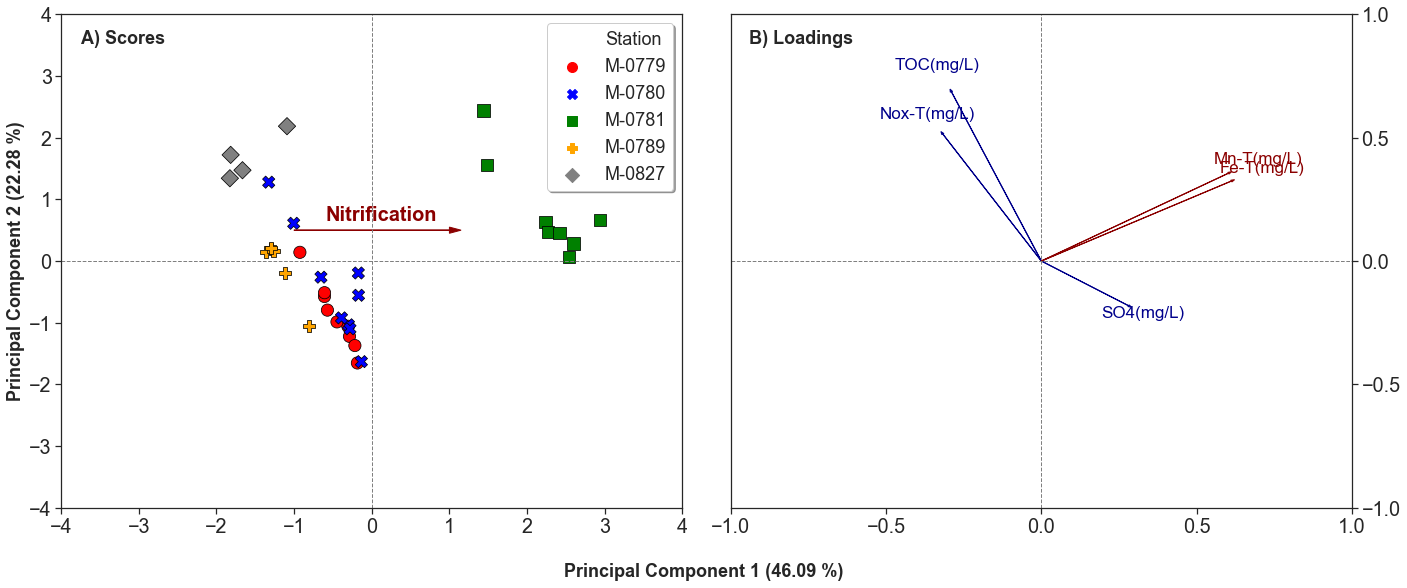

In [27]:
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#from matplotlib_colorbar.colorbar import Colorbar
from matplotlib.ticker import LogLocator
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(1, 2, figsize = (20, 8))


#axins = inset_axes(ax, width='50%', height='50%', loc= 'upper right') 
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca, hue = 'Station', s = 150, edgecolor="black", style = 'Station',
                palette = ['red', 'blue', 'green', 'orange', 'grey'], legend = 'full', ax = ax[0])

lgnd = ax[0].legend(scatterpoints=1, fontsize=18, shadow = True)

for handle in lgnd.legendHandles:
    handle.set_sizes([100])

ax[0].axhline(y=0, color = 'grey', linestyle='--', linewidth = 1)
ax[1].axhline(y=0, color = 'grey', linestyle='--', linewidth = 1)
ax[0].axvline(x=0, color = 'grey', linestyle='--', linewidth = 1)
ax[1].axvline(x=0, color = 'grey', linestyle='--', linewidth = 1)

for i in n :
    plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'darkblue', head_width=0.008)
    plt.text(coeff[i, 0]*1.16, coeff[i, 1]*1.16, X.columns[i], color = 'darkblue', ha = 'center', va = 'center', fontsize = 17)
    
for i in N :
    plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'darkred', head_width=0.008)
    plt.text(coeff[i, 0]*1.16, coeff[i, 1]*1.16, X.columns[i], color = 'darkred', ha = 'center', va = 'center', fontsize = 17)
    
    
ax[0].set_xlabel('')
#ax[0].set_xlabel('Principal Component 1 ({:.2f} %)'.format(pc1_eig), weight = 'bold', fontsize = 18)
#ax[1].set_xlabel('Principal Component 1 ({:.2f} %)'.format(pc1_eig), weight = 'bold', fontsize = 18)
ax[0].set_ylabel('Principal Component 2 ({:.2f} %)'.format(pc2_eig), weight = 'bold', fontsize = 18)
#ax[1].set_ylabel('Principal Component 2 ({:.2f} %)'.format(pc2_eig), weight = 'bold', fontsize = 18)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
    
ax[0].set_xlim(-4, 4)
ax[0].set_ylim(-4, 4)
ax[1].set_xlim(-1, 1, 0.5)
ax[1].set_ylim(-1, 1)

ax[1].set_xticks([-1, -.5, 0, .5, 1])
ax[1].set_yticks([-1, -.5, 0, .5, 1])

ax[0].text(-3.75, 3.75, 'A) Scores', weight = 'bold', fontsize = 18,
          verticalalignment = 'top', horizontalalignment='left')

ax[1].text(-.94, .94, 'B) Loadings', weight = 'bold', fontsize = 18,
          verticalalignment = 'top', horizontalalignment='left')

ax[0].arrow(-1, 0.5, 2, 0, color = 'darkred', head_width = 0.1, width  = 0.01)
ax[0].text(-.6, 0.65, 'Nitrification', weight = 'bold', fontsize = 20, color = 'darkred')

fig.text(0.5, -.03, 'Principal Component 1 ({:.2f} %)'.format(pc1_eig), weight = 'bold', fontsize = 18, ha='center')
#plt.text(.35, .9, 'Permeability ($10^{-18}$ m/s)') #fontsize = 15)

plt.tight_layout()
plt.savefig('Nitrification_Some_2', dpi=1000,  ext='png', bbox_inches="tight")


In [28]:
df = pd.read_csv('data/WQ All wells.csv', encoding = 'cp949')
df['Date'] = df['Date'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18647 entries, 0 to 18646
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Station         18647 non-null  object        
 1   Date            18647 non-null  datetime64[ns]
 2   Sample Type     18647 non-null  object        
 3   Analyte         18647 non-null  object        
 4   Value           18623 non-null  float64       
 5   Qualifier Code  7548 non-null   object        
 6   Unit            18647 non-null  object        
 7   Matrix Name     18647 non-null  object        
 8   Major Type      18647 non-null  object        
 9   Minor Type      18647 non-null  object        
 10  Lab Status      18647 non-null  object        
 11  Comments        2271 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 1.7+ MB


In [29]:
df = df[(df['Station'] == 'M-0779') | (df['Station'] == 'M-0780') | (df['Station'] == 'M-0781')] #(df['Station'] == 'M-0789') | (df['Station'] == 'M-0827')]
df

,Station,Date,Sample Type,Analyte,Value,Qualifier Code,Unit,Matrix Name,Major Type,Minor Type,Lab Status,Comments
10605,M-0779,2015-01-22 11:39:00,GRAB,Ag-T,0.079575,T,ug/L,WATER,Ambient,None,Historical/Archived,NaN
10606,M-0779,2015-01-22 11:39:00,GRAB,Al-T,43.259170,NaN,ug/L,WATER,Ambient,None,Historical/Archived,NaN
10607,M-0779,2015-01-22 11:39:00,GRAB,Alkalinity,307.193024,NaN,mg/L,WATER,Ambient,None,Historical/Archived,NaN
10608,M-0779,2015-01-22 11:39:00,GRAB,As-T,-2.261812,T,ug/L,WATER,Ambient,None,Historical/Archived,NaN
10609,M-0779,2015-01-22 11:39:00,GRAB,Ba-T,27.478300,NaN,ug/L,WATER,Ambient,None,Historical/Archived,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11749,M-0781,2016-12-07 08:51:00,GRAB,V-T,1.061327,I,ug/L,WATER,Ambient,None,Provisional,NaN
11750,M-0781,2016-12-07 08:51:00,GRAB,Water Level DTW-ft < Measuring Point,23.820000,NaN,ft,FIELD DATA,Ambient,None,Provisional,NaN
11751,M-0781,2016-12-07 08:51:00,GRAB,Water Temp,22.060000,NaN,deg C,FIELD DATA,Ambient,None,Provisional,NaN
11752,M-0781,2016-12-07 08:51:00,GRAB,Zn-T,2.869294,T,ug/L,WATER,Ambient,None,Provisional,NaN


In [30]:
ex = df['Analyte'].value_counts().to_frame()
pd.set_option('display.max_rows', 30)
ex[:]

,Analyte
NH4-T,24
Al-T,24
Sr-T,24
Ni-T,24
Se-T,24
...,...
Be-T,15
Measuring Point Elevation-ft,15
Sb-T,15
V-T,15


In [31]:
train = pd.pivot_table(df, index = ['Date', 'Station'], columns = 'Analyte', values = 'Value')

X = train[['Mg-T', 'Se-T', 'Cl', 'Mo-T', 'TKN-T', 'Ca-T', 'Pb-T', 'Alkalinity', 'Cr-T', 'Conductivity', 'Na-T', 'Zn-T', 'K-T',
          'Ag-T', 'TP-T', 'Al-T', 'Hardness Calculated Ca+Mg', 'NOx-T', 'Cu-T', 'As-T', 'Sr-T', 'Cd-T', 'Ba-T', 'Mn-T',
          'TOC', 'Ni-T', 'Fe-T', 'SO4', 'TDS', 'NH4-T', 'Conductivity', 'Mn-T', 'TDS', 'TKN-T', 'Alkalinity',
          'SO4', 'Ba-T', 'Zn-T', 'K-T', 'Cr-T', 'DO']]

#X['PO4-T'].fillna(X['PO4-T'].mean(), inplace = True)

train.reset_index(inplace = True)
Y = train[['Station']]

In [32]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)
x_std[:3]

array([[-0.61319294, -1.62200386,  0.06105264,  3.13899594, -0.61894004,
         0.61396119, -4.07807426,  0.83766315, -0.3234242 ,  0.90277961,
         0.59483544,  1.52222295, -0.86297983, -3.11994513,  0.26088908,
        -0.43796903,  0.50665338, -1.56047486, -0.20499121,  0.55063513,
        -0.65939358,  2.60350879,  0.76640366,  1.31453567, -0.42630093,
         0.14118366,  1.2684678 , -0.13892242,  0.73025079, -1.0476669 ,
         0.90277961,  1.31453567,  0.73025079, -0.61894004,  0.83766315,
        -0.13892242,  0.76640366,  1.52222295, -0.86297983, -0.3234242 ,
         2.24408737],
       [-0.79387987, -2.31135087, -0.56431037,  0.12762723,  2.11957667,
        -0.96775692, -2.14480303, -0.7485347 ,  2.75262994, -1.19224022,
        -0.5054055 ,  0.00685294,  1.97907519,  0.39244571,  3.0925616 ,
         2.9835894 , -1.18928098, -0.96036346, -0.19917121, -1.52899948,
        -0.82957763, -0.40587778,  0.4261147 , -0.31744903,  0.41090193,
        -0.86141198, -0.38163

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pc = pca.fit_transform(x_std)
pc[:3]

array([[ 5.17096285, -0.16489174],
       [-3.23488709,  6.12136315],
       [-2.58735691, -2.91444534]])

In [34]:
pc_y = np.c_[pc, Y]
df_pca = pd.DataFrame(pc_y, columns = ['PC1', 'PC2', 'Station'])
df_pca.sort_values(by = ['Station'], ascending = True, inplace = True)
df_pca.head()

#personnel_df.sort_values(by=['sequence'], axis=0, ascending=False)

,PC1,PC2,Station
11,-2.39288,-2.94742,M-0779
20,-2.50575,-3.03062,M-0779
17,-2.81646,-3.3558,M-0779
14,-2.01251,-3.13093,M-0779
8,-3.54539,-2.69979,M-0779


In [35]:
coeff = np.transpose(pca.components_[0:2])
n = coeff.shape[0]

In [36]:
df_coeff = pd.DataFrame(coeff, columns = ['PC1', 'PC2'])
df_coeff['Columns'] = 0
df_coeff['Columns'] = X.columns
df_coeff.style.format({"PC1": "{:20,.3f}", "PC2": "{:20,.3f}"}).background_gradient(cmap='Blues')

,PC1,PC2,Columns
0,-0.082,-0.325,Mg-T
1,0.023,-0.026,Se-T
2,0.129,-0.031,Cl
3,0.184,0.016,Mo-T
4,-0.146,0.202,TKN-T
5,0.216,-0.010,Ca-T
6,-0.024,-0.067,Pb-T
7,0.234,0.012,Alkalinity
8,0.046,0.162,Cr-T
9,0.218,-0.131,Conductivity


In [37]:
pca_val = pca.explained_variance_ratio_
pca_val
pc1_eig = pca_val[0]*100
pc2_eig = pca_val[1]*100

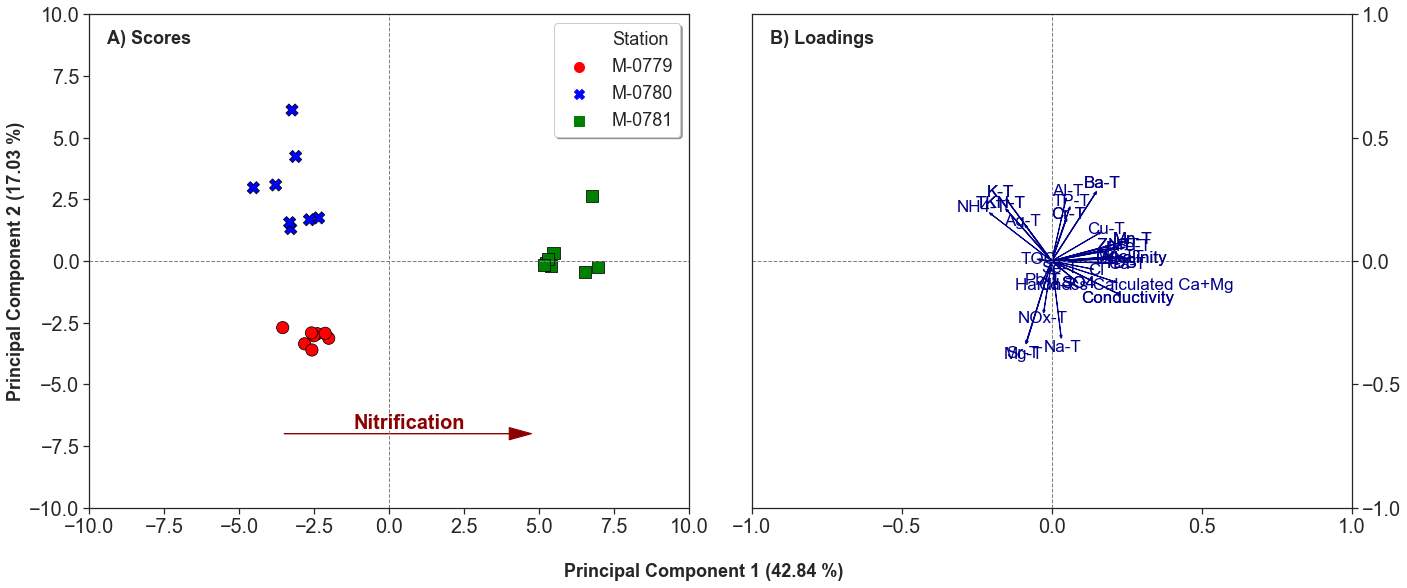

In [38]:
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#from matplotlib_colorbar.colorbar import Colorbar
from matplotlib.ticker import LogLocator
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(1, 2, figsize = (20, 8))


#axins = inset_axes(ax, width='50%', height='50%', loc= 'upper right') 
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca, hue = 'Station', s = 150, edgecolor="black", style = 'Station',
                palette = ['red', 'blue', 'green'], legend = 'full', ax = ax[0])

lgnd = ax[0].legend(scatterpoints=1, fontsize=18, shadow = True)

for handle in lgnd.legendHandles:
    handle.set_sizes([100])


ax[0].axhline(y=0, color = 'grey', linestyle='--', linewidth = 1)
ax[1].axhline(y=0, color = 'grey', linestyle='--', linewidth = 1)
ax[0].axvline(x=0, color = 'grey', linestyle='--', linewidth = 1)
ax[1].axvline(x=0, color = 'grey', linestyle='--', linewidth = 1)

for i in range(41) :
    plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'darkblue', head_width=0.008)
    plt.text(coeff[i, 0]*1.16, coeff[i, 1]*1.16, X.columns[i], color = 'darkblue', ha = 'center', va = 'center', fontsize = 17)

"""    
for i in N :
    plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'darkred', head_width=0.008)
    plt.text(coeff[i, 0]*1.16, coeff[i, 1]*1.16, X.columns[i], color = 'darkred', ha = 'center', va = 'center', fontsize = 17)
"""
    
ax[0].set_xlabel('')
#ax[0].set_xlabel('Principal Component 1 ({:.2f} %)'.format(pc1_eig), weight = 'bold', fontsize = 18)
#ax[1].set_xlabel('Principal Component 1 ({:.2f} %)'.format(pc1_eig), weight = 'bold', fontsize = 18)
ax[0].set_ylabel('Principal Component 2 ({:.2f} %)'.format(pc2_eig), weight = 'bold', fontsize = 18)
#ax[1].set_ylabel('Principal Component 2 ({:.2f} %)'.format(pc2_eig), weight = 'bold', fontsize = 18)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
    
ax[0].set_xlim(-10, 10)
ax[0].set_ylim(-10, 10)
ax[1].set_xlim(-1, 1, 0.5)
ax[1].set_ylim(-1, 1)

ax[1].set_xticks([-1, -.5, 0, .5, 1])
ax[1].set_yticks([-1, -.5, 0, .5, 1])

ax[0].text(-9.4, 9.4, 'A) Scores', weight = 'bold', fontsize = 18,
          verticalalignment = 'top', horizontalalignment='left')

ax[1].text(-.94, .94, 'B) Loadings', weight = 'bold', fontsize = 18,
          verticalalignment = 'top', horizontalalignment='left')

ax[0].arrow(-3.5, -7, 7.5, 0, color = 'darkred', head_width = 0.5, width = 0.01)
ax[0].text(-1.2, -6.8, 'Nitrification', weight = 'bold', fontsize = 20, color = 'darkred')

fig.text(0.5, -.03, 'Principal Component 1 ({:.2f} %)'.format(pc1_eig), weight = 'bold', fontsize = 18, ha='center')
#plt.text(.35, .9, 'Permeability ($10^{-18}$ m/s)') #fontsize = 15)

plt.tight_layout()
plt.savefig('Nitrification_Some_3', dpi=1000,  ext='png', bbox_inches="tight")


In [39]:
df = pd.read_csv('data/WQ All wells.csv', encoding = 'cp949')
df['Date'] = df['Date'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18647 entries, 0 to 18646
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Station         18647 non-null  object        
 1   Date            18647 non-null  datetime64[ns]
 2   Sample Type     18647 non-null  object        
 3   Analyte         18647 non-null  object        
 4   Value           18623 non-null  float64       
 5   Qualifier Code  7548 non-null   object        
 6   Unit            18647 non-null  object        
 7   Matrix Name     18647 non-null  object        
 8   Major Type      18647 non-null  object        
 9   Minor Type      18647 non-null  object        
 10  Lab Status      18647 non-null  object        
 11  Comments        2271 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 1.7+ MB


In [40]:
df = df[(df['Station'] == 'M-0779') | (df['Station'] == 'M-0780') | (df['Station'] == 'M-0781')| (df['Station'] == 'M-0789') | (df['Station'] == 'M-0827')]
df['Station'].value_counts()

M-0779    383
M-0780    383
M-0781    383
M-0789    254
Name: Station, dtype: int64

In [41]:
ex = df['Analyte'].value_counts().to_frame()
ex = ex[ex['Analyte'] == 30]
index_list = ex.index.tolist()

In [42]:
train = pd.pivot_table(df, index = ['Date', 'Station'], columns = 'Analyte', values = 'Value')
train.reset_index(inplace = True)

X = train[index_list]
Y = train[['Station']]

Y

Analyte,Station
0,M-0781
1,M-0780
2,M-0779
3,M-0781
4,M-0780
5,M-0779
6,M-0781
7,M-0780
8,M-0779
9,M-0781


In [43]:
X['PO4-T'].fillna(X['PO4-T'].mean(), inplace = True)
X['PO4-T'].isnull().sum()

D:\Teddy\Application\Anaconda\envs\teddy\lib\site-packages\pandas\core\generic.py:6244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


0

In [44]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)
x_std[:3]

array([[ 2.67451513e-01,  8.15536921e-01, -2.20683214e-01,
         2.88331525e+00, -3.25060323e-01, -1.87864038e+00,
        -8.99272156e-02,  1.50372345e+00,  6.63228782e-02,
        -4.58020644e+00,  9.28884355e-01, -3.85733769e-01,
         4.66850684e-01, -4.52554952e-01, -5.03148161e-01,
         2.22030673e-01,  1.54328611e+00,  9.83461242e-01,
         6.36850800e-01,  8.35846288e-01,  7.45985306e-01,
         9.95514547e-01,  3.42358995e+00, -3.35803172e+00,
        -5.21892941e-01, -5.56775922e-01, -4.38065006e-01,
         9.09932019e-01, -1.54829677e-01, -4.92279205e-01,
        -7.36948686e-01],
       [ 3.42123766e+00, -1.86975767e-03,  2.15154958e+00,
        -4.65071479e-01,  3.33851755e+00, -2.61289233e+00,
        -4.55558287e-01, -2.33708514e-01, -9.99967044e-01,
        -2.42280572e+00, -1.96416075e-01,  2.42124771e+00,
        -2.89529472e-01,  1.58553267e+00, -6.80179611e-01,
        -4.41660527e-01, -1.10396894e-01,  6.82926893e-01,
        -1.68356352e+00, -4.35

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pc = pca.fit_transform(x_std)
pc[:3]

array([[ 4.12942067,  0.73572288],
       [-0.59701937, -0.93176857],
       [-0.52454745, -4.60731851]])

In [46]:
pc_y = np.c_[pc, Y]
df_pca = pd.DataFrame(pc_y, columns = ['PC1', 'PC2', 'Station'])
df_pca.head()

,PC1,PC2,Station
0,4.12942,0.735723,M-0781
1,-0.597019,-0.931769,M-0780
2,-0.524547,-4.60732,M-0779
3,5.99421,2.97732,M-0781
4,-0.418688,-0.319636,M-0780


In [47]:
df_pca

,PC1,PC2,Station
0,4.12942,0.735723,M-0781
1,-0.597019,-0.931769,M-0780
2,-0.524547,-4.60732,M-0779
3,5.99421,2.97732,M-0781
4,-0.418688,-0.319636,M-0780
5,-0.452772,-2.43607,M-0779
6,4.1098,1.01,M-0781
7,-1.22719,-1.45476,M-0780
8,-0.994185,-2.47257,M-0779
9,3.94232,1.47155,M-0781


In [48]:
coeff = np.transpose(pca.components_[0:2])
n = coeff.shape[0]

In [49]:
df_coeff = pd.DataFrame(coeff, columns = ['PC1', 'PC2'])
df_coeff['Columns'] = 0
df_coeff['Columns'] = X.columns
df_coeff.style.bar(subset=['PC1', 'PC2'], align = 'mid', color = ['#d65f5f', '#5fba7d'])

,PC1,PC2,Columns
0,0.039485,0.140629,TP-T
1,0.187586,-0.248402,Na-T
2,0.046330,-0.252053,TKN-T
3,0.002738,-0.065365,Cd-T
4,0.112387,0.046042,Al-T
5,-0.045092,0.156513,Se-T
6,0.110429,0.046761,SO4
7,0.277623,0.168360,Fe-T
8,0.144904,0.318296,Ni-T
9,-0.035300,-0.008941,Pb-T


In [50]:
pca_val = pca.explained_variance_ratio_
pca_val
pc1_eig = pca_val[0]*100
pc2_eig = pca_val[1]*100

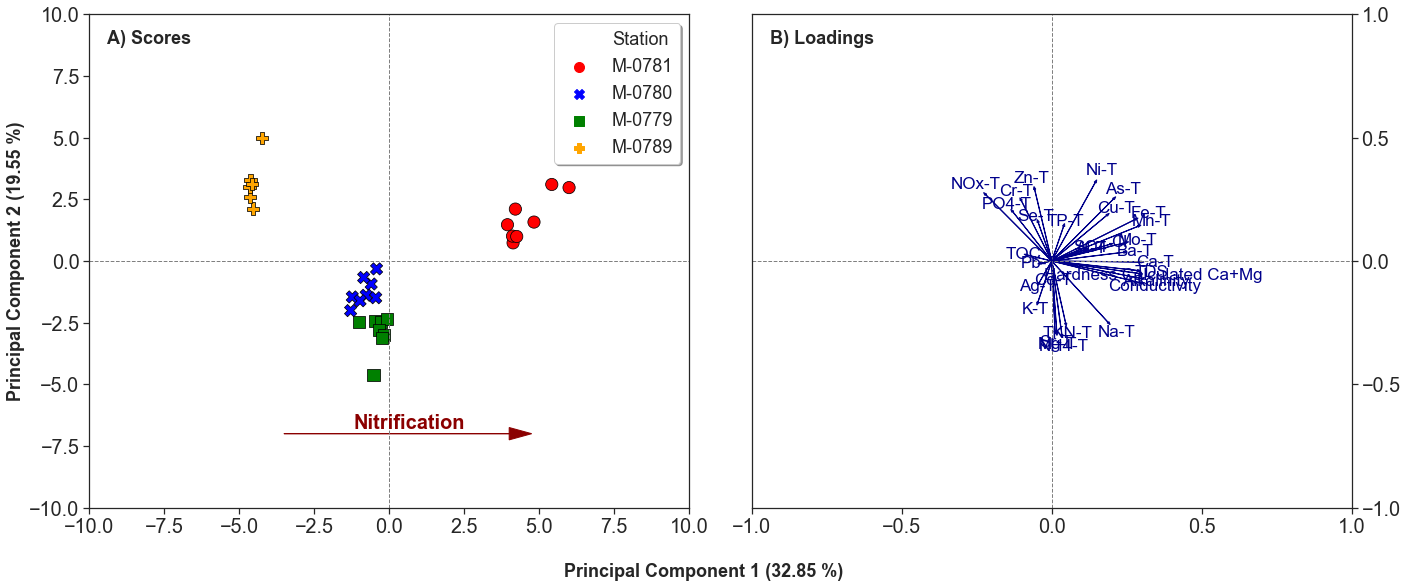

In [51]:
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#from matplotlib_colorbar.colorbar import Colorbar
from matplotlib.ticker import LogLocator
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(1, 2, figsize = (20, 8))


#axins = inset_axes(ax, width='50%', height='50%', loc= 'upper right') 
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca, hue = 'Station', s = 150, edgecolor="black", style = 'Station',
                palette = ['red', 'blue', 'green', 'orange'], legend = 'full', ax = ax[0])

lgnd = ax[0].legend(scatterpoints=1, fontsize=18, shadow = True)

for handle in lgnd.legendHandles:
    handle.set_sizes([100])


ax[0].axhline(y=0, color = 'grey', linestyle='--', linewidth = 1)
ax[1].axhline(y=0, color = 'grey', linestyle='--', linewidth = 1)
ax[0].axvline(x=0, color = 'grey', linestyle='--', linewidth = 1)
ax[1].axvline(x=0, color = 'grey', linestyle='--', linewidth = 1)

for i in range(31) :
    plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'darkblue', head_width=0.008)
    plt.text(coeff[i, 0]*1.16, coeff[i, 1]*1.16, X.columns[i], color = 'darkblue', ha = 'center', va = 'center', fontsize = 17)

"""    
for i in N :
    plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'darkred', head_width=0.008)
    plt.text(coeff[i, 0]*1.16, coeff[i, 1]*1.16, X.columns[i], color = 'darkred', ha = 'center', va = 'center', fontsize = 17)
"""
    
ax[0].set_xlabel('')
#ax[0].set_xlabel('Principal Component 1 ({:.2f} %)'.format(pc1_eig), weight = 'bold', fontsize = 18)
#ax[1].set_xlabel('Principal Component 1 ({:.2f} %)'.format(pc1_eig), weight = 'bold', fontsize = 18)
ax[0].set_ylabel('Principal Component 2 ({:.2f} %)'.format(pc2_eig), weight = 'bold', fontsize = 18)
#ax[1].set_ylabel('Principal Component 2 ({:.2f} %)'.format(pc2_eig), weight = 'bold', fontsize = 18)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
    
ax[0].set_xlim(-10, 10)
ax[0].set_ylim(-10, 10)
ax[1].set_xlim(-1, 1, 0.5)
ax[1].set_ylim(-1, 1)

ax[1].set_xticks([-1, -.5, 0, .5, 1])
ax[1].set_yticks([-1, -.5, 0, .5, 1])

ax[0].text(-9.4, 9.4, 'A) Scores', weight = 'bold', fontsize = 18,
          verticalalignment = 'top', horizontalalignment='left')

ax[1].text(-.94, .94, 'B) Loadings', weight = 'bold', fontsize = 18,
          verticalalignment = 'top', horizontalalignment='left')

ax[0].arrow(-3.5, -7, 7.5, 0, color = 'darkred', head_width = 0.5, width = 0.01)
ax[0].text(-1.2, -6.8, 'Nitrification', weight = 'bold', fontsize = 20, color = 'darkred')

fig.text(0.5, -.03, 'Principal Component 1 ({:.2f} %)'.format(pc1_eig), weight = 'bold', fontsize = 18, ha='center')
#plt.text(.35, .9, 'Permeability ($10^{-18}$ m/s)') #fontsize = 15)

plt.tight_layout()
plt.savefig('Nitrification_Some_4', dpi=1000,  ext='png', bbox_inches="tight")
